In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mltcolors

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('data/training_vals.csv')

In [3]:
df_test = pd.read_csv('data/test_vals.csv')

In [4]:
df_labels = pd.read_csv('data/training_labels.csv')

In [5]:
df.columns

Index([u'id', u'amount_tsh', u'date_recorded', u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name', u'num_private',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group'],
      dtype='object')

In [6]:
df.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True], dtype=bool)

In [7]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [9]:
for col in df.columns:
    if len(df[str(col)].unique())<100:
        print(col, df[str(col)].unique())
        print '\n'

('amount_tsh', array([  6.00000000e+03,   0.00000000e+00,   2.50000000e+01,
         2.00000000e+01,   2.00000000e+02,   5.00000000e+02,
         5.00000000e+01,   4.00000000e+03,   1.50000000e+03,
         6.00000000e+00,   2.50000000e+02,   1.00000000e+01,
         1.00000000e+03,   1.00000000e+02,   3.00000000e+01,
         2.00000000e+03,   4.00000000e+02,   1.20000000e+03,
         4.00000000e+01,   3.00000000e+02,   2.50000000e+04,
         7.50000000e+02,   5.00000000e+03,   6.00000000e+02,
         7.20000000e+03,   2.40000000e+03,   5.00000000e+00,
         3.60000000e+03,   4.50000000e+02,   4.00000000e+04,
         1.20000000e+04,   3.00000000e+03,   7.00000000e+00,
         2.00000000e+04,   2.80000000e+03,   2.20000000e+03,
         7.00000000e+01,   5.50000000e+03,   1.00000000e+04,
         2.50000000e+03,   6.50000000e+03,   5.50000000e+02,
         3.30000000e+01,   8.00000000e+03,   4.70000000e+03,
         7.00000000e+03,   1.40000000e+04,   1.30000000e+03,
         

In [10]:
df.recorded_by.unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [15]:
#Check to see if IDs are in the same order
len(df_labels) == sum(df_labels.id == df.id)

True

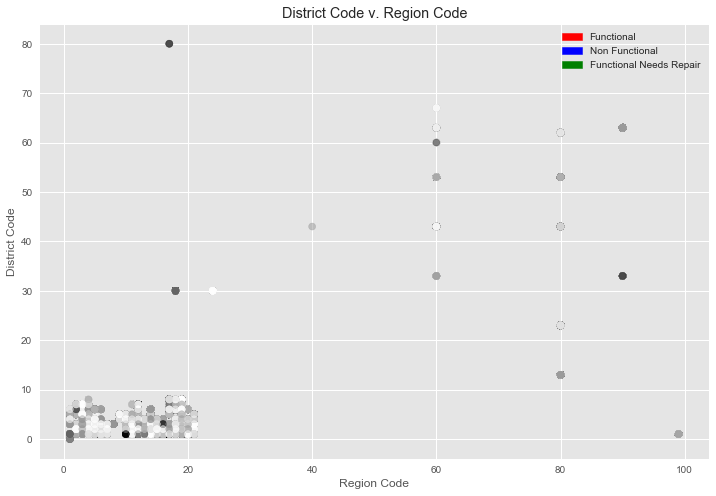

In [67]:
color = np.zeros(len(df_labels))

for i,lab in enumerate(df_labels.status_group):
    if lab == 'functional':
        color[i] = 1
    elif lab == 'non functional':
        color[i] = 2
    elif lab == 'functional needs repair':
        color[i] = 3

fig, ax = plt.subplots(1,1,figsize=(12,8))

one = mpatches.Patch(color='red', label='Functional')
two = mpatches.Patch(color='blue', label='Non Functional')
three = mpatches.Patch(color='green', label = 'Functional Needs Repair')


ax.scatter(df.region_code, df.district_code, c=color, alpha=0.5)
ax.set_xlabel("Region Code")
ax.set_ylabel("District Code")
ax.set_title("District Code v. Region Code")
ax.legend(handles=[one, two, three])

In [46]:
test = df.join(df_labels.set_index('id'), on='id')

In [50]:
test.columns

Index([u'id', u'amount_tsh', u'date_recorded', u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name', u'num_private',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')

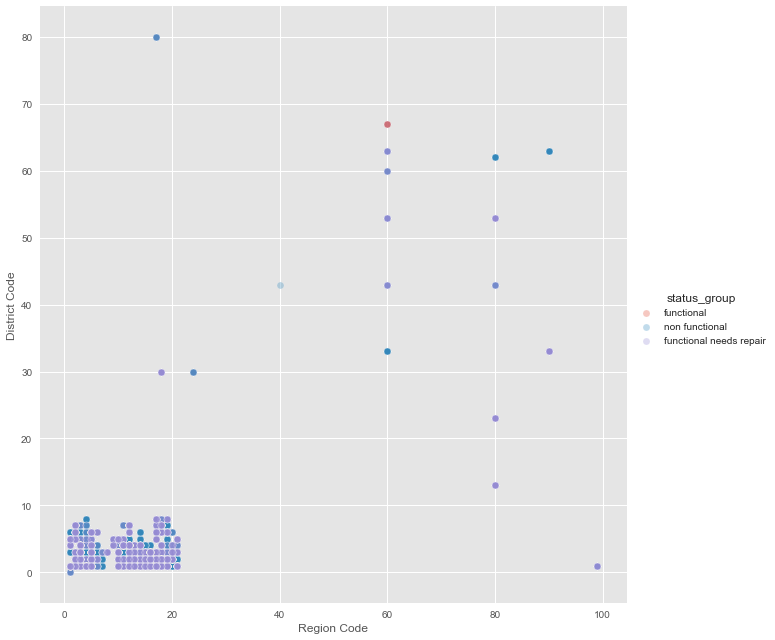

In [66]:
g = sns.FacetGrid(test,  hue="status_group", size=9)
g = (g.map(plt.scatter, "region_code", "district_code", edgecolor="w", alpha=0.3).add_legend())\
.set_xlabels('Region Code').set_ylabels('District Code')